In [113]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer, LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE as sm
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pickle

In [2]:
#import the data 
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no null value

In [5]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


there are catogorical and numerical values

In [7]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


there are many ' ?' values in the dataset. So lets check how many values are there

In [8]:
(df==' ?').sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Workclass has 1836 ' ?' and Occupation has 1843 ' ?' and Native_country has 583 ' ?' values

In [9]:
#converting ' ?' to NaN values
df.replace({' ?': np.nan}, inplace=True) 

In [10]:
# Separating numerical and categorical variable
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

Missing value imputation

In [11]:
# Imputating Missing value with mode for categorical features
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

Missing Value Check After Imputataion

In [12]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Age                          0             0.0
Workclass                    0             0.0
Fnlwgt                       0             0.0
Education                    0             0.0
Education_num                0             0.0
Marital_status               0             0.0
Occupation                   0             0.0
Relationship                 0             0.0
Race                         0             0.0
Sex                          0             0.0
Capital_gain                 0             0.0
Capital_loss                 0             0.0
Hours_per_week               0             0.0
Native_country               0             0.0
Income                       0             0.0


Finally, No Missing Value is Present.

<Axes: >

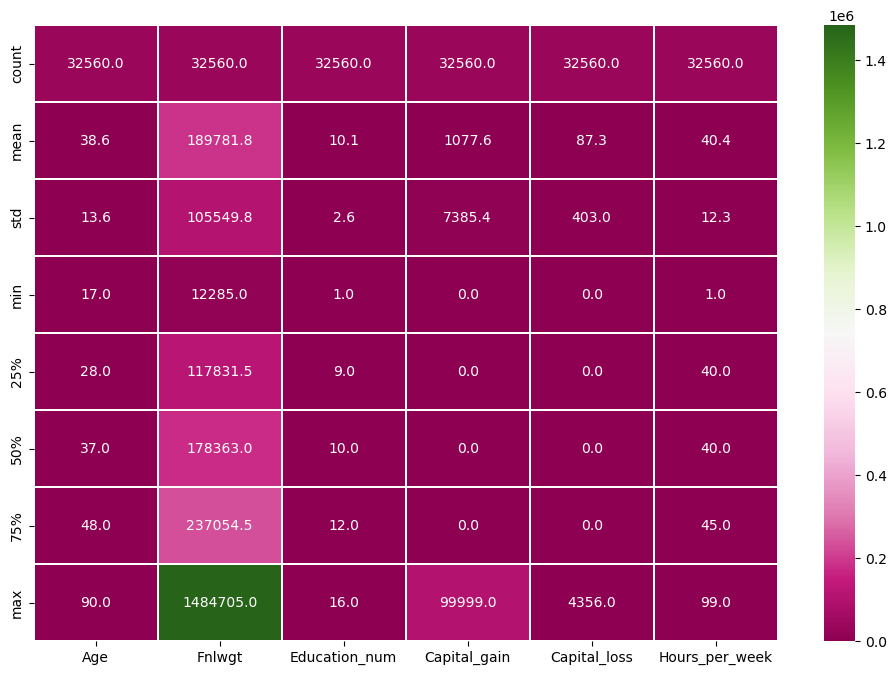

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.

The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.

While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.

The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [15]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Workclass
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       5983
 Craft-repair         40

<Axes: xlabel='count', ylabel='Workclass'>

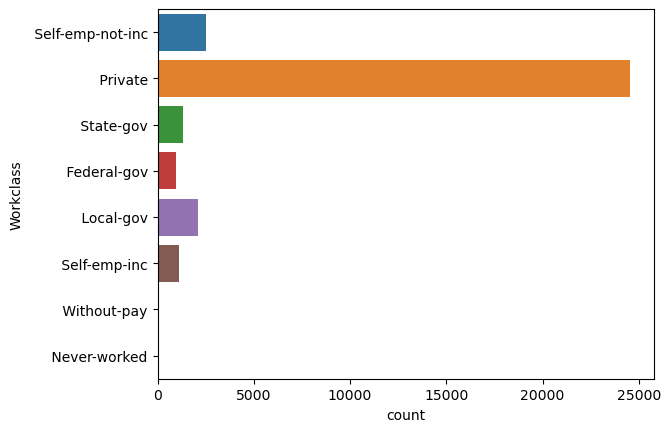

In [16]:
sns.countplot(y = df.Workclass)

here we can see Private has high value

In [17]:
df.Workclass.mode()

0     Private
Name: Workclass, dtype: object

In [18]:
df.Workclass.isnull().sum()/32560*100

0.0

In [19]:
(df['Workclass'] == ' Private').sum()/df.Workclass.count()*100

75.34398034398035

75.34% of Workclass data is ' Private'.

because the majority of the column value is Private we can convert 'Private' to NaN values in Workclass column

In [20]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )
si = si.fit(df[['Workclass']])
df[['Workclass']] = si.transform(df[['Workclass']])
df[['Workclass']].isnull().sum()

Workclass    0
dtype: int64

so there are no null values

In [21]:
df.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

<Axes: xlabel='count', ylabel='Native_country'>

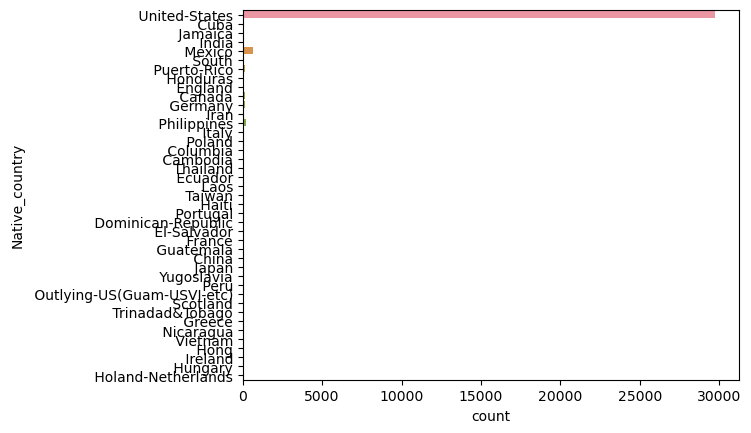

In [22]:
sns.countplot(y=df.Native_country)

so there are only 2 value United-States and Mexico. Max value is United-States which is around 29000.

In [23]:
df.Native_country.mode()

0     United-States
Name: Native_country, dtype: object

In [24]:
df.Native_country.isnull().sum()/32560*100

0.0

In [25]:
(df['Native_country'] == ' United-States').sum()/df.Native_country.count()*100 

91.37592137592138

Therefore imputing ' United-States' to NaN values in Native_country column

In [26]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )
si = si.fit(df[['Native_country']])
df[['Native_country']] = si.transform(df[['Native_country']])
df[['Native_country']].isnull().sum()

Native_country    0
dtype: int64

There are no more null values in 'Workclass' column

lets look at Occupation

<Axes: xlabel='count', ylabel='Occupation'>

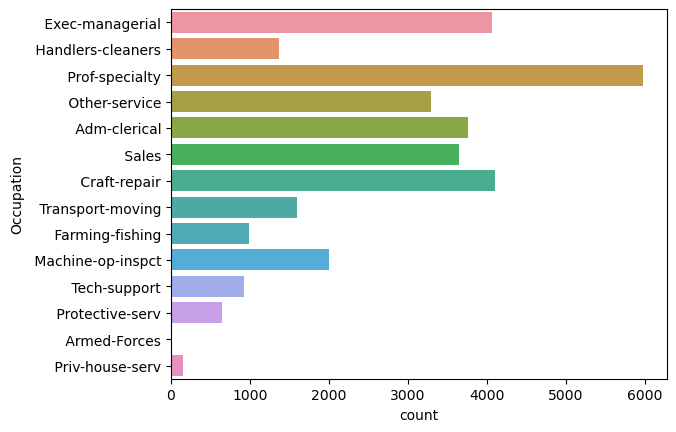

In [27]:
sns.countplot(y=df.Occupation)

In [28]:
df.Occupation.mode()

0     Prof-specialty
Name: Occupation, dtype: object

heighest income for the occupation is Prof-specialty

In [29]:
df.Occupation.isnull().sum()/32560*100

0.0

so there are no null values

In [30]:
(df['Occupation'] == ' Prof-specialty').sum()/df.Occupation.count()*100

18.375307125307124

18% of the occupation is prof-specialty

In [31]:
df.shape

(32560, 15)

In [32]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [33]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [34]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

lets analyse Education_num

<Axes: xlabel='Education_num', ylabel='Density'>

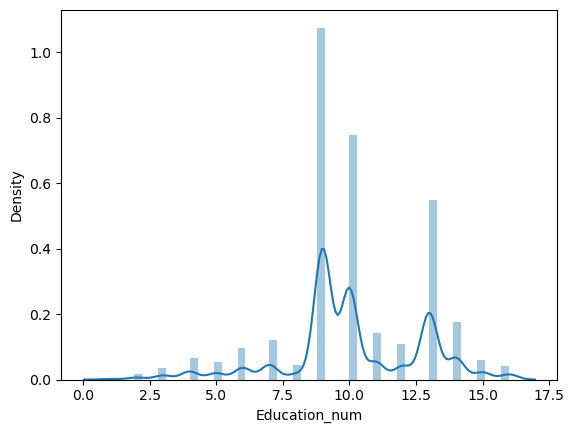

In [35]:
sns.distplot(df.Education_num)

lets analyse the target class

In [36]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

There are 2 unique catergorical values in the Label column / target variable.

In [37]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<Axes: xlabel='Income', ylabel='count'>

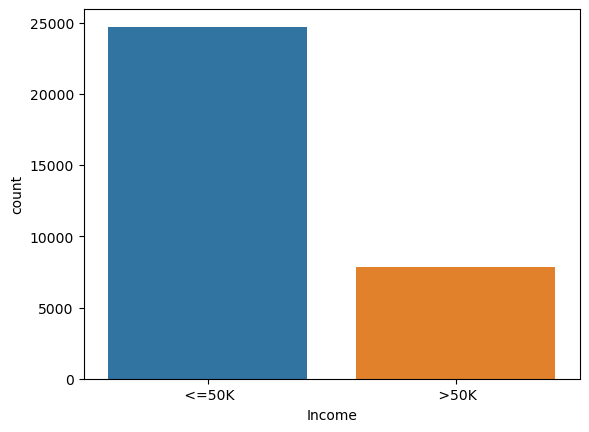

In [38]:
sns.countplot(x=df['Income'])

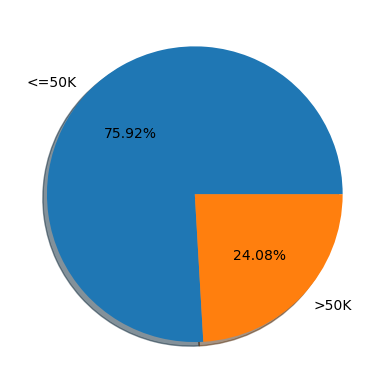

In [39]:
labels = '<=50K','>50K'
fig, ax = plt.subplots()
ax.pie(df['Income'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

In [40]:
df.dtypes[df.dtypes == 'object'] 

Workclass         object
Education         object
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Native_country    object
Income            object
dtype: object

In [41]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<Axes: xlabel='count', ylabel='Workclass'>

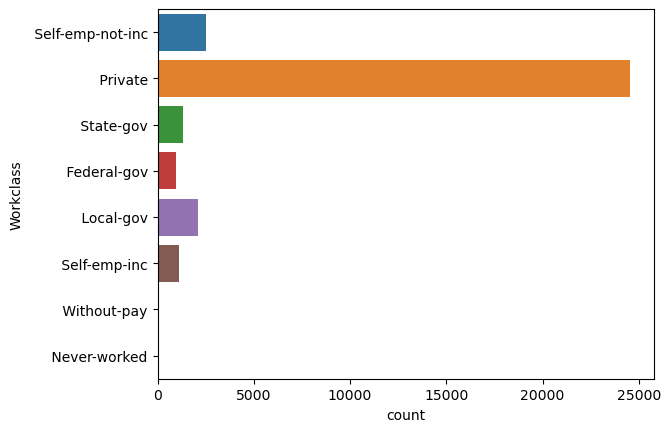

In [42]:
sns.countplot(y=df['Workclass'])

Majority of the people belong to Private Workclass.

In [43]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

<Axes: xlabel='count', ylabel='Education'>

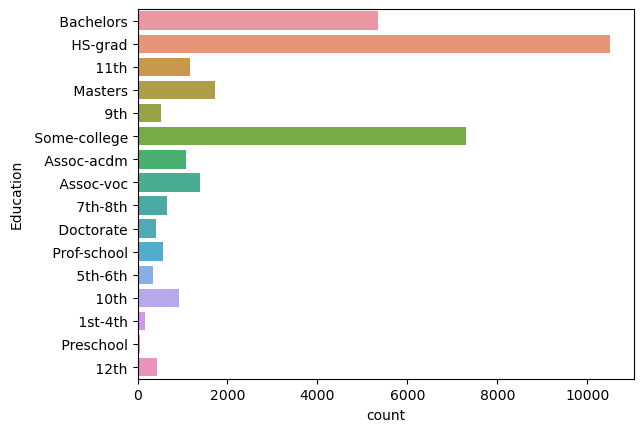

In [44]:
sns.countplot(y=df['Education'])

there are more than 10000 high school graduate and attended some college

In [45]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

<Axes: xlabel='count', ylabel='Marital_status'>

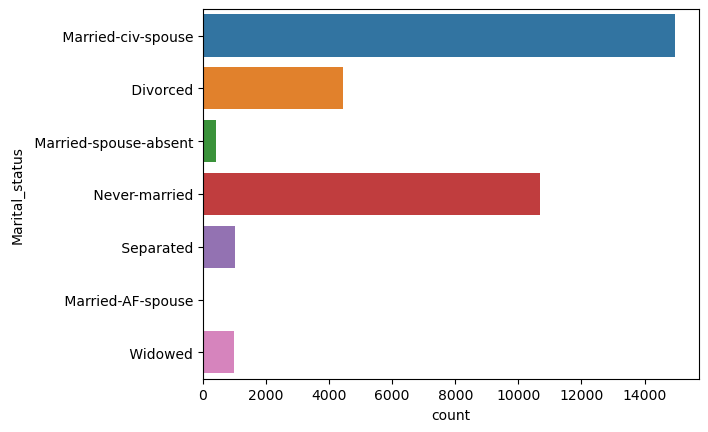

In [46]:
sns.countplot(y=df['Marital_status'])

maximum people are married and next is never married

In [47]:
df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

<Axes: xlabel='count', ylabel='Occupation'>

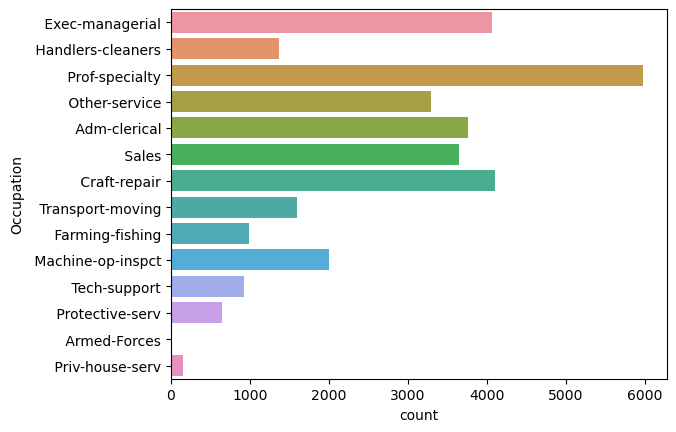

In [48]:
sns.countplot(y=df['Occupation'])

highest occupation is Prof-speciality, Exec-manegerial, craft-repair

In [49]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

<Axes: xlabel='count', ylabel='Relationship'>

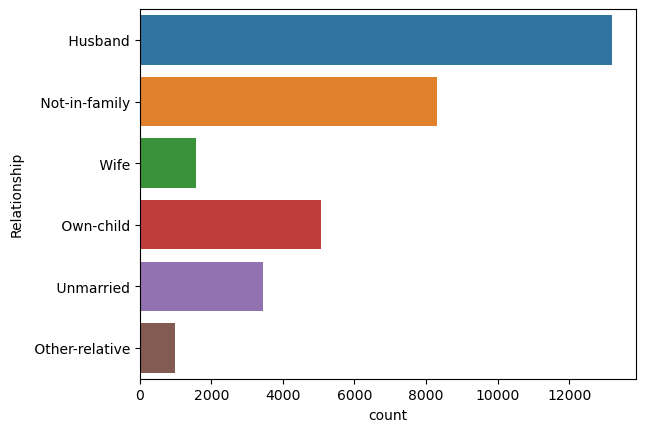

In [50]:
sns.countplot(y=df['Relationship'])

Husband is the most common relationship.

In [51]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

<Axes: xlabel='count', ylabel='Race'>

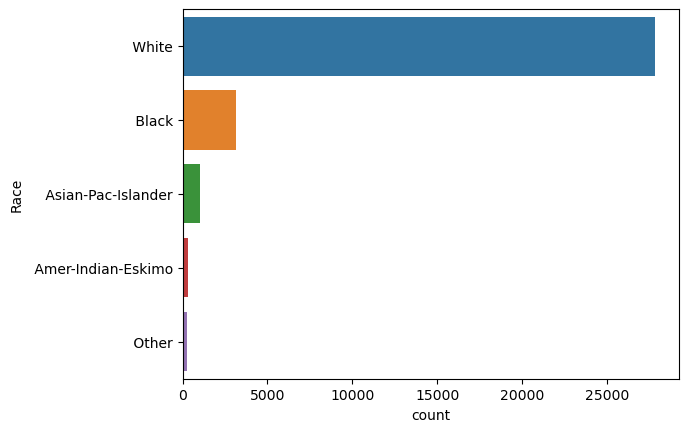

In [52]:
sns.countplot(y=df['Race'])

Whites form the majority.

In [53]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

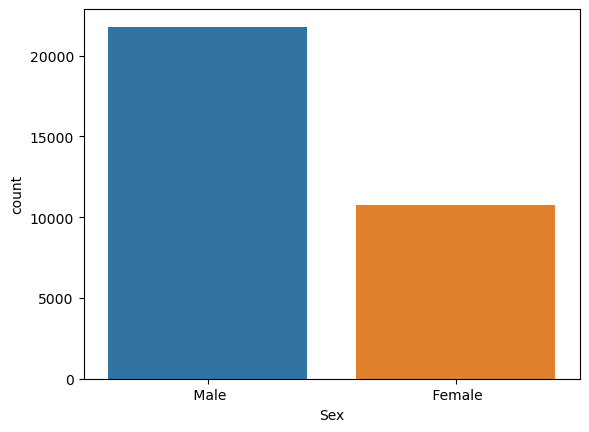

In [54]:
sns.countplot(x=df['Sex'])

majority are Male

In [55]:
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

<Axes: xlabel='count', ylabel='Native_country'>

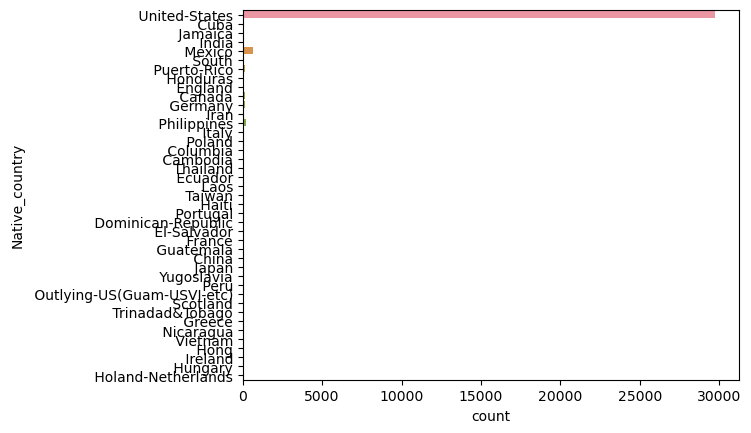

In [56]:
sns.countplot(y=df['Native_country'])

I can see just United-States others are too less to notify

In [57]:
#Identifying the continues column
df.dtypes[df.dtypes != 'object']

Age               int64
Fnlwgt            int64
Education_num     int64
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
dtype: object

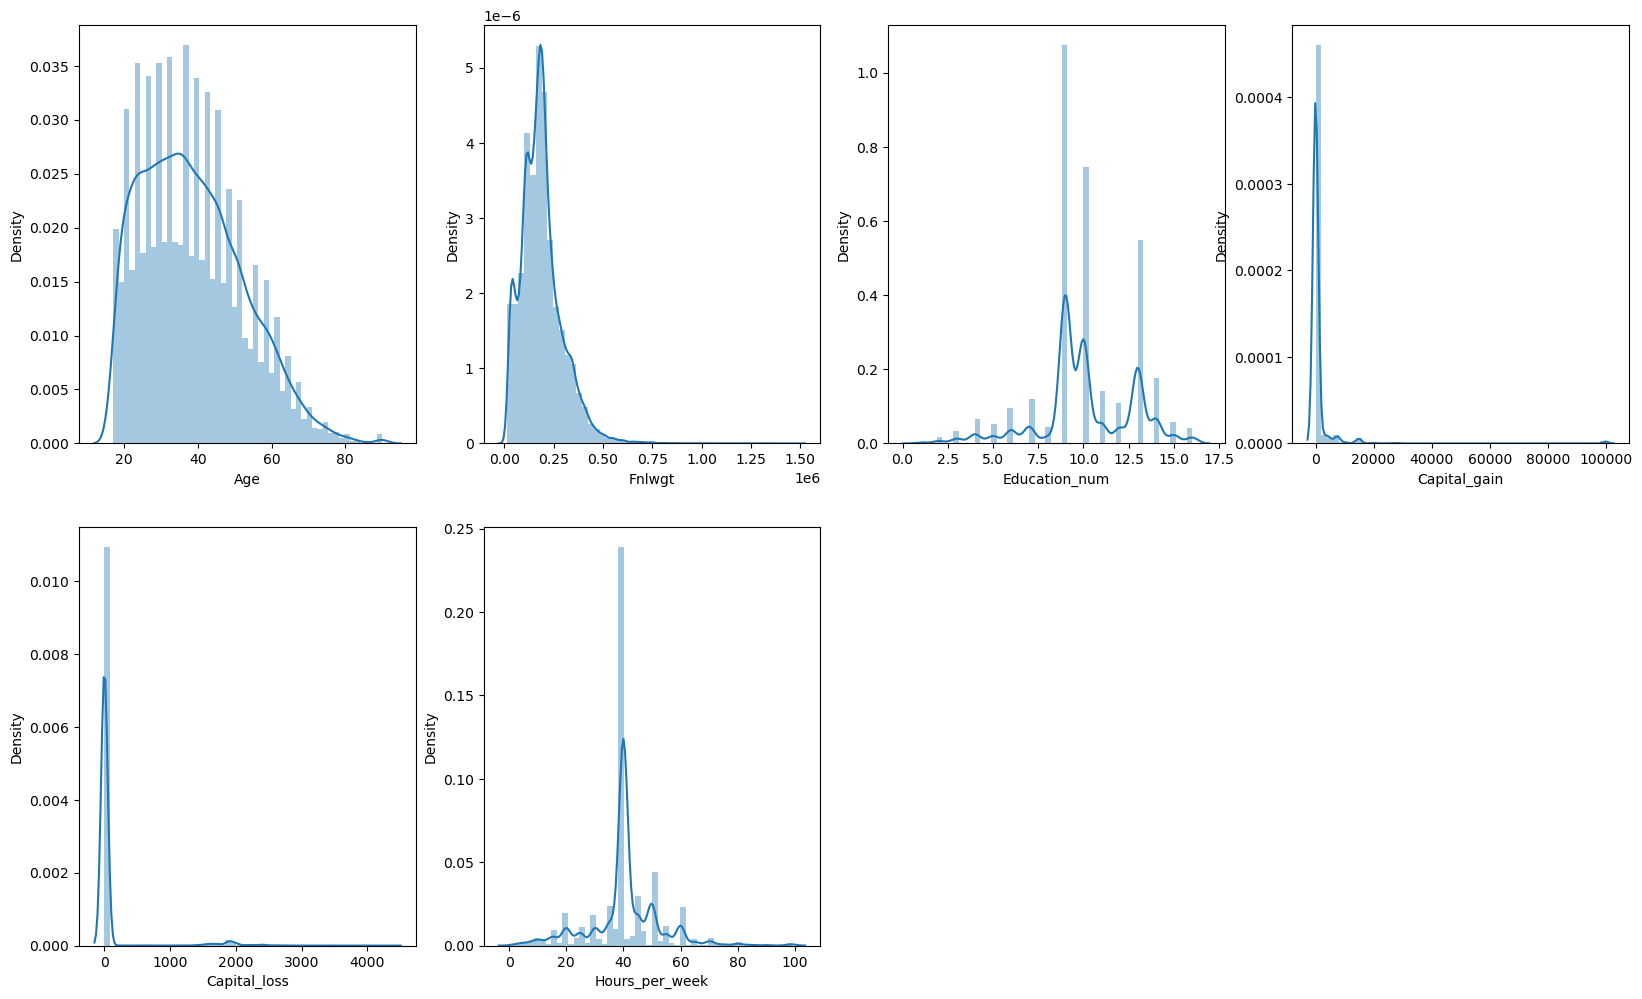

In [58]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=10)
    plotnum+=1
plt.show()

In [59]:
df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']].skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

we can still see the skews

income vs continous column 

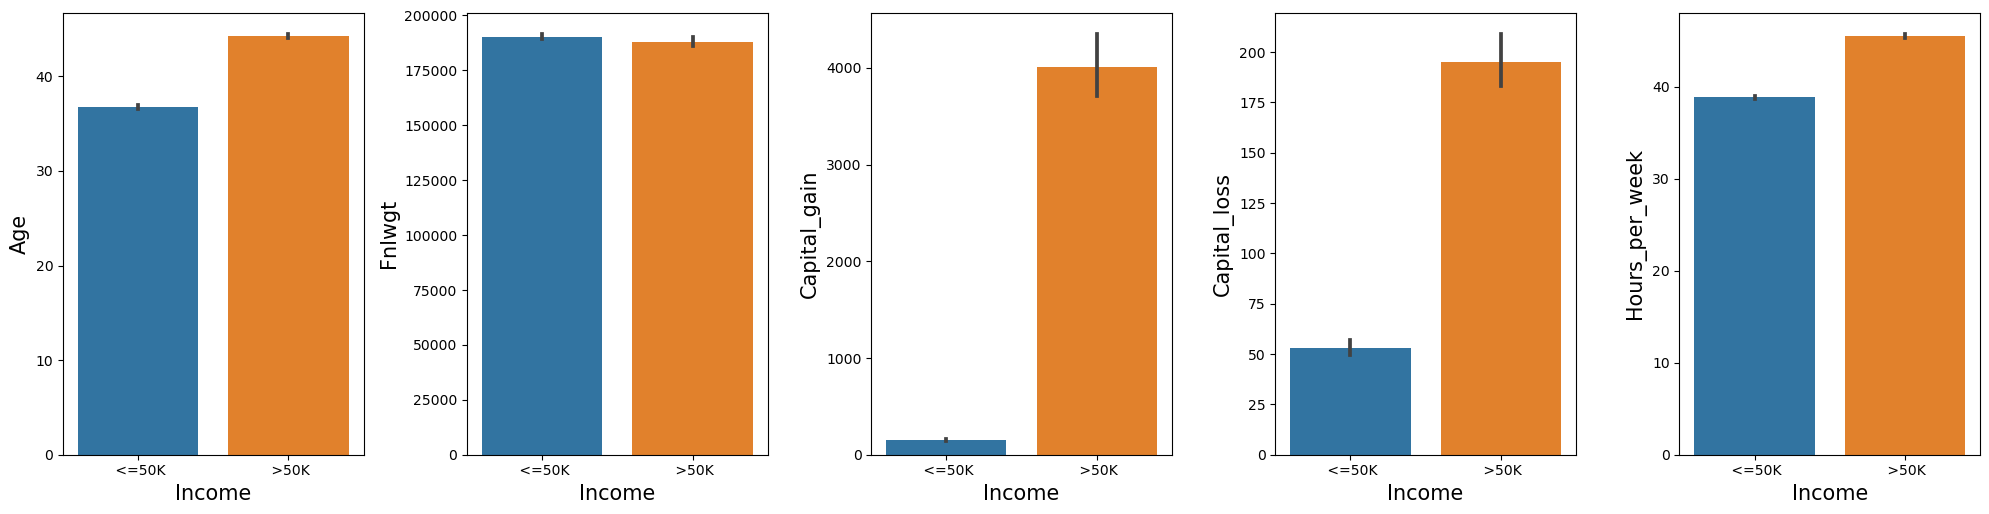

In [60]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df['Income']
X = df[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]
for col in X:
    if plotnum<=15:
        plt.subplot(5,5,plotnum)
        sns.barplot(x=y,y=X[col])
        plt.xlabel('Income',fontsize=15)
        plt.ylabel(col,fontsize=15)
    plotnum+=1
plt.tight_layout()

Majority of people aged 35 and below that is, the younger population earns <=50k.

fnlwgt doesn't seem to impact income much.

Higher Education_num contributes to higher income >50k

Higher Capital Gain and Higher Capital Loss contribute to higher income >50k

People who work greater than 40 hours per week earn >50k

Income vs Categorical column

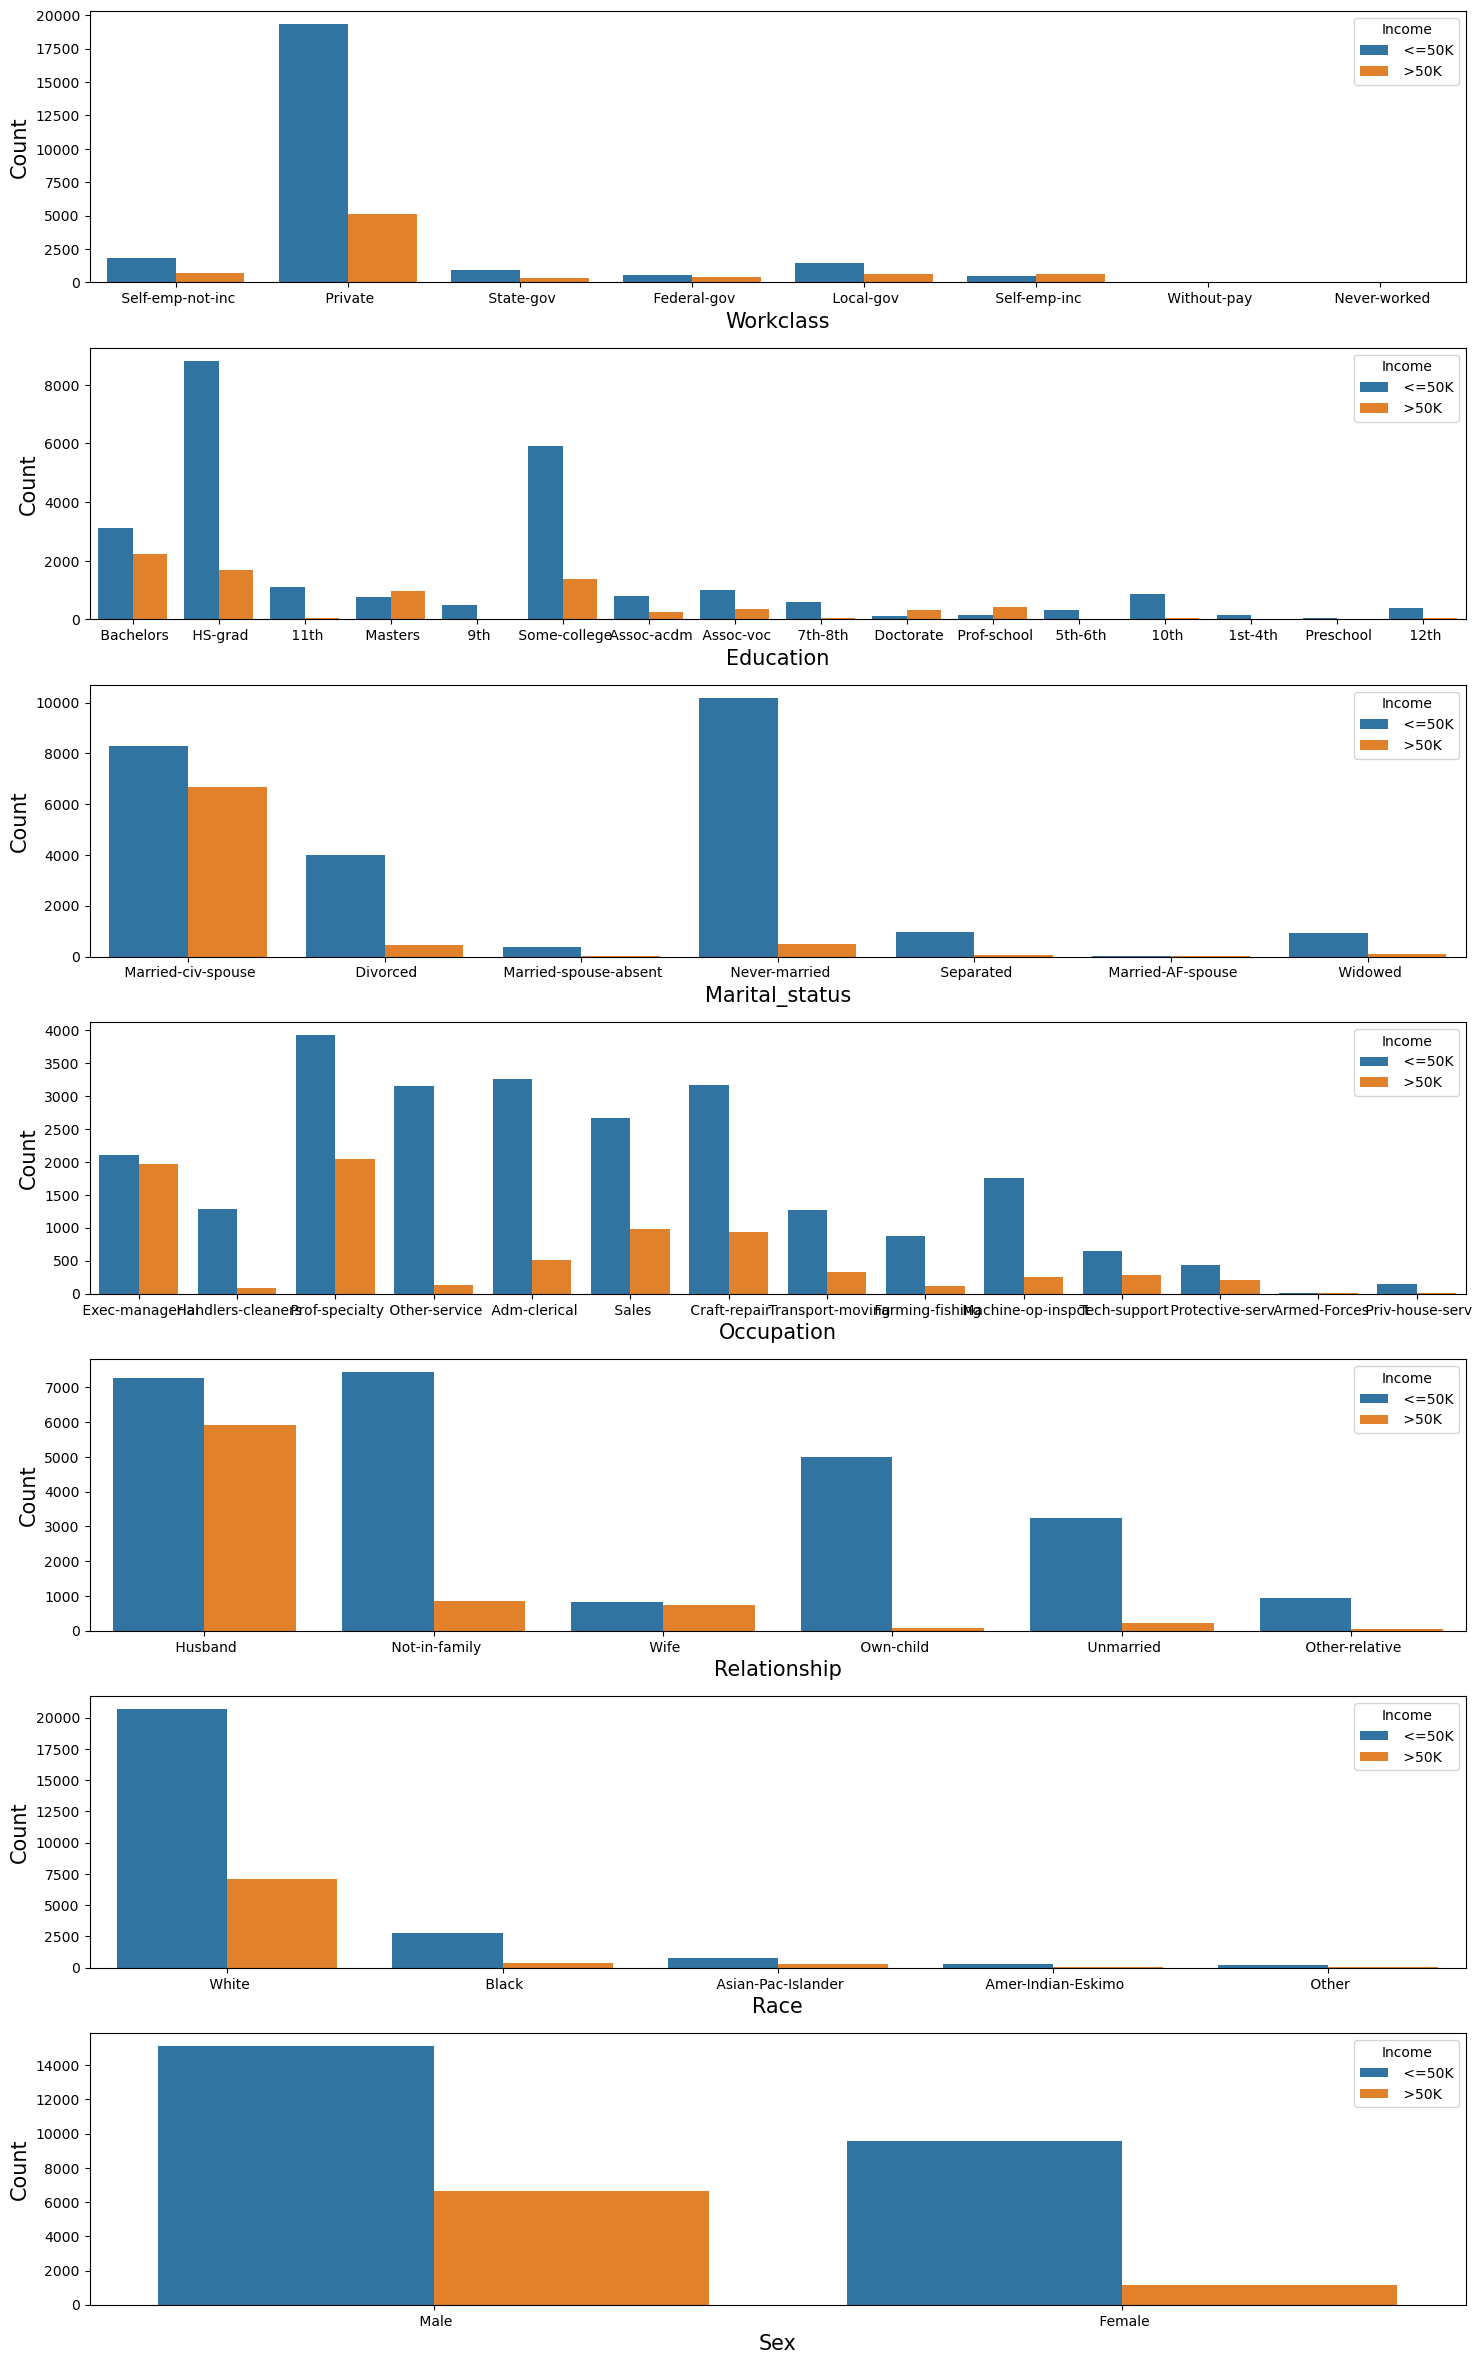

In [61]:
plt.figure(figsize=(15,30),facecolor='white')
plotnum=1
y = df['Income']
X = df[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex']]
for col in X:
    if plotnum<=23:
        plt.subplot(9,1,plotnum)
        sns.countplot(x=X[col],hue =y)
        plt.xlabel(col,fontsize=15)
        plt.ylabel('Count',fontsize=15)
    plotnum+=1
plt.tight_layout()

<Axes: xlabel='count', ylabel='Native_country'>

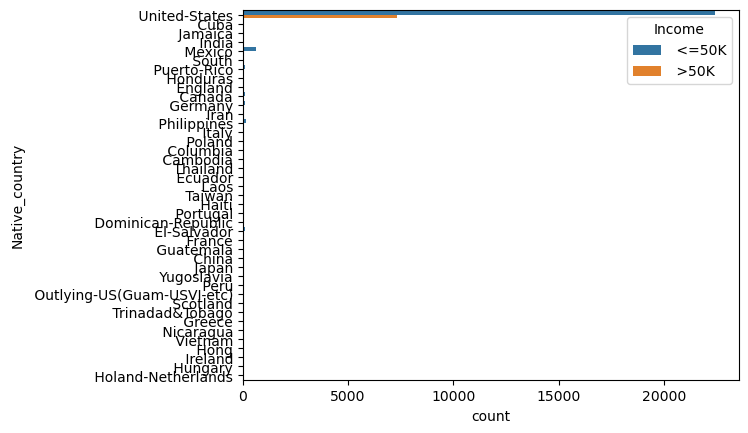

In [62]:
sns.countplot(y=df['Native_country'],hue =df['Income'])

Checking for Outliers 

In [63]:
X = df.drop(columns = ['Income'])
y = df['Income']

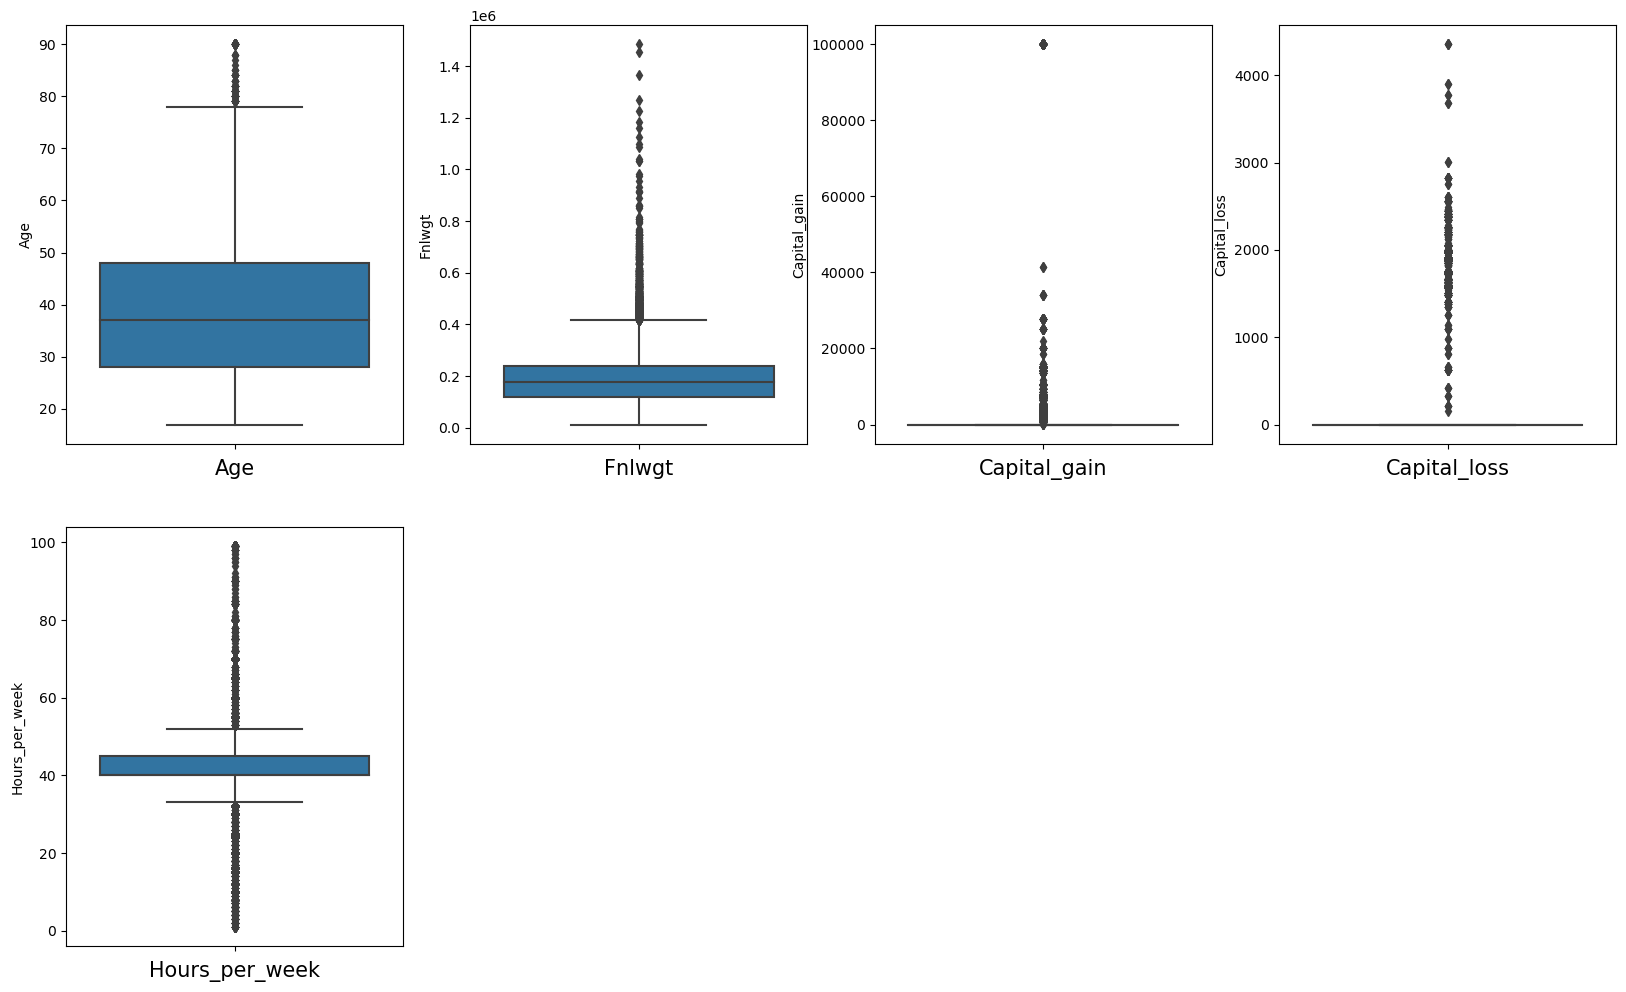

In [64]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(y=X[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

All columns have a lot of outliers. so lets remove Outliers using Z score Method

In [65]:
df2 = X[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']].copy()
df2

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,0,0,13
1,38,215646,0,0,40
2,53,234721,0,0,40
3,28,338409,0,0,40
4,37,284582,0,0,40
...,...,...,...,...,...
32555,27,257302,0,0,38
32556,40,154374,0,0,40
32557,58,151910,0,0,40
32558,22,201490,0,0,20


In [66]:
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [67]:
df3.shape, df2.shape

((30028, 5), (32560, 5))

Data loose

In [68]:
loss=(32560-30028)/30717 * 100
loss

8.24299247973435

8% Data loss is within acceptable range.

In [69]:
dropindx = X.index.difference(df3.index)

In [70]:
#dropping the outliers from original features Dataframe
df.drop(dropindx,inplace = True) 
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [71]:
X = df.drop(columns = ['Income'])
y = df['Income']

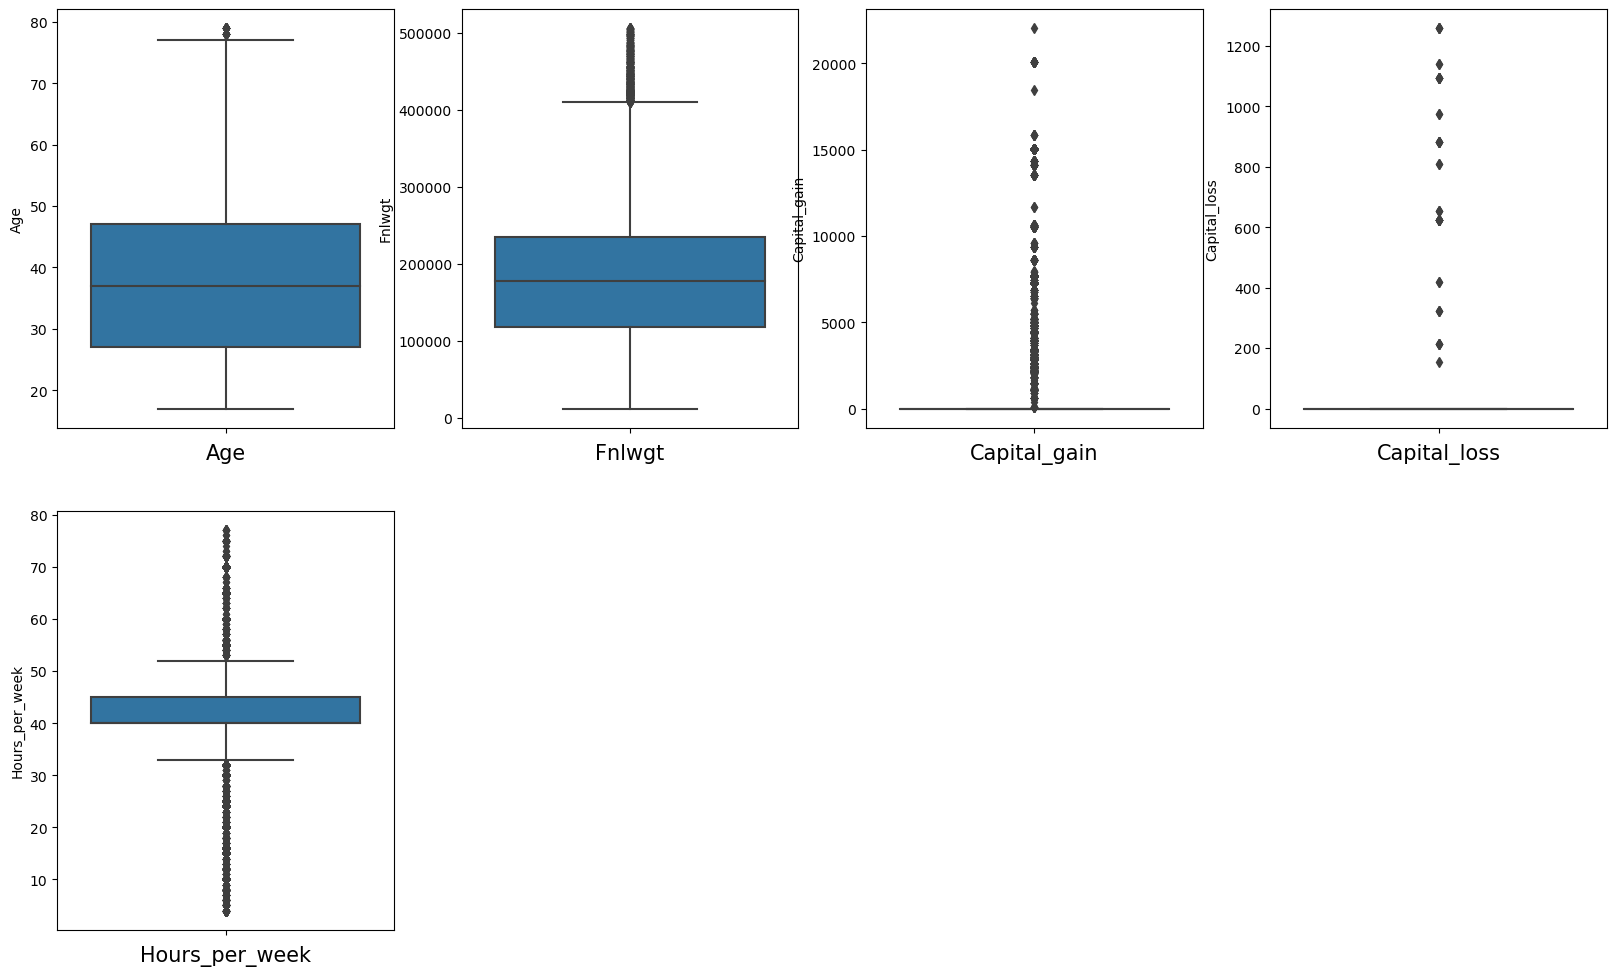

In [72]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(y=X[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

some outliers are removed

lets check Skewness

In [73]:
X.skew()

Age                0.489206
Fnlwgt             0.633615
Education_num     -0.324321
Capital_gain       4.957931
Capital_loss      29.761341
Hours_per_week    -0.350891
dtype: float64

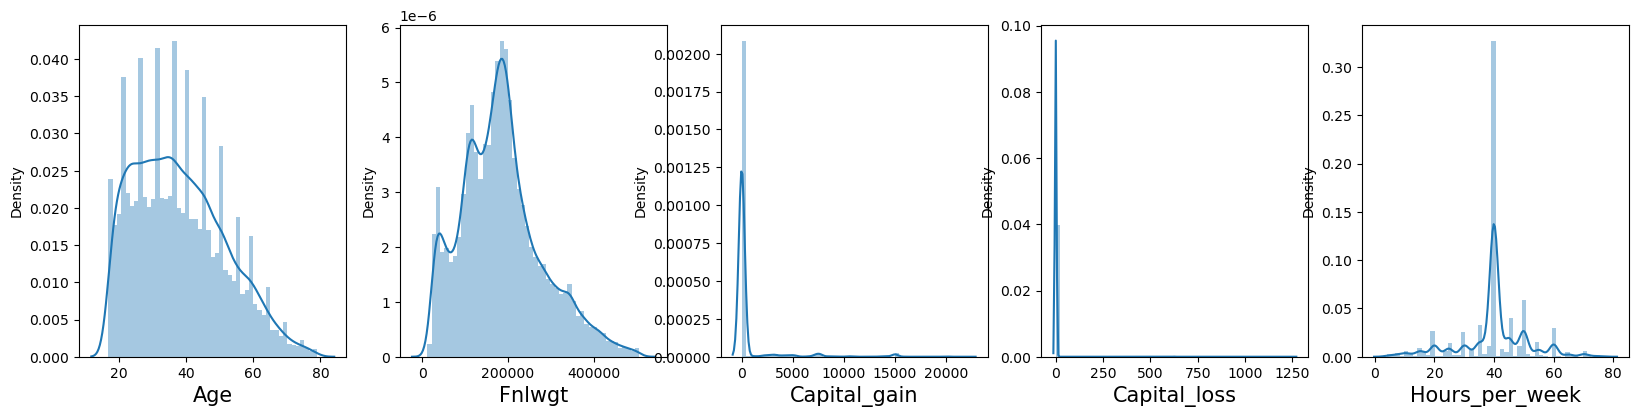

In [74]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=35:
        plt.subplot(5,5,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

Reducing skewness further using PowerTransformer

In [75]:
pt= PowerTransformer(method='yeo-johnson', standardize=True)
df4 = X[['Fnlwgt','Capital_gain','Capital_loss']]
transformed= pt.fit_transform(df4)
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe
transformed.skew()

Fnlwgt          -0.034890
Capital_gain     3.082525
Capital_loss    24.952898
dtype: float64

In [76]:
transformed.index = df.index

In [77]:
df[['Fnlwgt','Capital_gain','Capital_loss']]=transformed[['Fnlwgt','Capital_gain','Capital_loss']]
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,-1.116219,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.296001,-0.040013,13,United-States,<=50K
1,38,Private,0.422177,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.296001,-0.040013,40,United-States,<=50K
2,53,Private,0.601968,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.296001,-0.040013,40,United-States,<=50K
3,28,Private,1.480733,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.296001,-0.040013,40,Cuba,<=50K
4,37,Private,1.042787,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.296001,-0.040013,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,0.806409,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,-0.296001,-0.040013,38,United-States,<=50K
32556,40,Private,-0.211195,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.296001,-0.040013,40,United-States,>50K
32557,58,Private,-0.238870,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,-0.296001,-0.040013,40,United-States,<=50K
32558,22,Private,0.284022,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,-0.296001,-0.040013,20,United-States,<=50K


Encoding the categorical Feature Columns, using get_dummies()

In [78]:
dumm = pd.get_dummies(df[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex']],drop_first = False)
dumm.shape

(30028, 58)

In [79]:
df = df.join(dumm)

In [80]:
df.drop(columns = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex'],axis = 1, inplace = True)

In [81]:
df

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Workclass_ Federal-gov,Workclass_ Local-gov,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,50,-1.116219,13,-0.296001,-0.040013,13,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1
1,38,0.422177,9,-0.296001,-0.040013,40,United-States,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,1
2,53,0.601968,7,-0.296001,-0.040013,40,United-States,<=50K,0,0,...,0,0,0,0,0,1,0,0,0,1
3,28,1.480733,13,-0.296001,-0.040013,40,Cuba,<=50K,0,0,...,0,0,1,0,0,1,0,0,1,0
4,37,1.042787,14,-0.296001,-0.040013,40,United-States,<=50K,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,0.806409,12,-0.296001,-0.040013,38,United-States,<=50K,0,0,...,0,0,1,0,0,0,0,1,1,0
32556,40,-0.211195,9,-0.296001,-0.040013,40,United-States,>50K,0,0,...,0,0,0,0,0,0,0,1,0,1
32557,58,-0.238870,9,-0.296001,-0.040013,40,United-States,<=50K,0,0,...,0,1,0,0,0,0,0,1,1,0
32558,22,0.284022,9,-0.296001,-0.040013,20,United-States,<=50K,0,0,...,1,0,0,0,0,0,0,1,0,1


Encoding the 'Native_country' Column using Label encoder

In [82]:
le = LabelEncoder()
col = ['Native_country']
df['Native_country'] = le.fit_transform(df['Native_country'].astype(str))

In [83]:
df['Income'] = df.Income.map({' <=50K':0,' >50K':1}) #'<=50K' = 0 and '>50K' = 1
df

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Workclass_ Federal-gov,Workclass_ Local-gov,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,50,-1.116219,13,-0.296001,-0.040013,13,37,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,38,0.422177,9,-0.296001,-0.040013,40,37,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,53,0.601968,7,-0.296001,-0.040013,40,37,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,28,1.480733,13,-0.296001,-0.040013,40,4,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,37,1.042787,14,-0.296001,-0.040013,40,37,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,0.806409,12,-0.296001,-0.040013,38,37,0,0,0,...,0,0,1,0,0,0,0,1,1,0
32556,40,-0.211195,9,-0.296001,-0.040013,40,37,1,0,0,...,0,0,0,0,0,0,0,1,0,1
32557,58,-0.238870,9,-0.296001,-0.040013,40,37,0,0,0,...,0,1,0,0,0,0,0,1,1,0
32558,22,0.284022,9,-0.296001,-0.040013,20,37,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [84]:
corr = df.corr()
corr

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,Workclass_ Federal-gov,Workclass_ Local-gov,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
Age,1.000000,-0.067465,0.029319,0.120310,0.019383,0.089518,-0.003275,0.236579,0.056844,0.065393,...,-0.440231,0.048585,0.024253,-0.008721,-0.013462,-0.013130,-0.034261,0.029012,-0.086214,0.086214
Fnlwgt,-0.067465,1.000000,-0.043314,-0.004008,-0.000145,-0.015420,-0.067960,-0.007188,-0.019211,-0.000587,...,0.015804,0.000349,-0.016251,-0.080213,-0.046742,0.102348,0.014573,-0.043477,-0.026383,0.026383
Education_num,0.029319,-0.043314,1.000000,0.105397,0.009506,0.148738,0.093321,0.317044,0.061572,0.101721,...,-0.092513,-0.056070,0.029065,-0.028510,0.062510,-0.075043,-0.045759,0.051549,-0.006303,0.006303
Capital_gain,0.120310,-0.004008,0.105397,1.000000,-0.011844,0.073255,0.010951,0.262024,0.012811,0.014038,...,-0.085514,-0.040368,0.039076,-0.000107,-0.003331,-0.030240,-0.012972,0.030287,-0.063678,0.063678
Capital_loss,0.019383,-0.000145,0.009506,-0.011844,1.000000,-0.003016,0.001577,-0.017346,0.002885,0.013368,...,-0.013008,0.066030,-0.005024,-0.004013,0.002267,0.001070,0.005307,-0.002274,0.033015,-0.033015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Race_ Black,-0.013130,0.102348,-0.075043,-0.030240,0.001070,-0.054811,0.020780,-0.088082,0.045924,0.036366,...,0.014100,0.152264,0.002396,-0.032733,-0.059092,1.000000,-0.030385,-0.787619,0.118054,-0.118054
Race_ Other,-0.034261,0.014573,-0.045759,-0.012972,0.005307,-0.010019,-0.109960,-0.030586,-0.001288,-0.011087,...,-0.004508,0.010088,0.004630,-0.009336,-0.016854,-0.030385,1.000000,-0.224643,0.014959,-0.014959
Race_ White,0.029012,-0.043477,0.051549,0.030287,-0.002274,0.053422,0.107535,0.084990,-0.048043,-0.023907,...,-0.012416,-0.131381,-0.012701,-0.242002,-0.436878,-0.787619,-0.224643,1.000000,-0.106734,0.106734
Sex_ Female,-0.086214,-0.026383,-0.006303,-0.063678,0.033015,-0.234314,-0.001858,-0.208901,-0.001138,0.036419,...,0.098440,0.322099,0.311579,0.010442,0.002904,0.118054,0.014959,-0.106734,1.000000,-1.000000


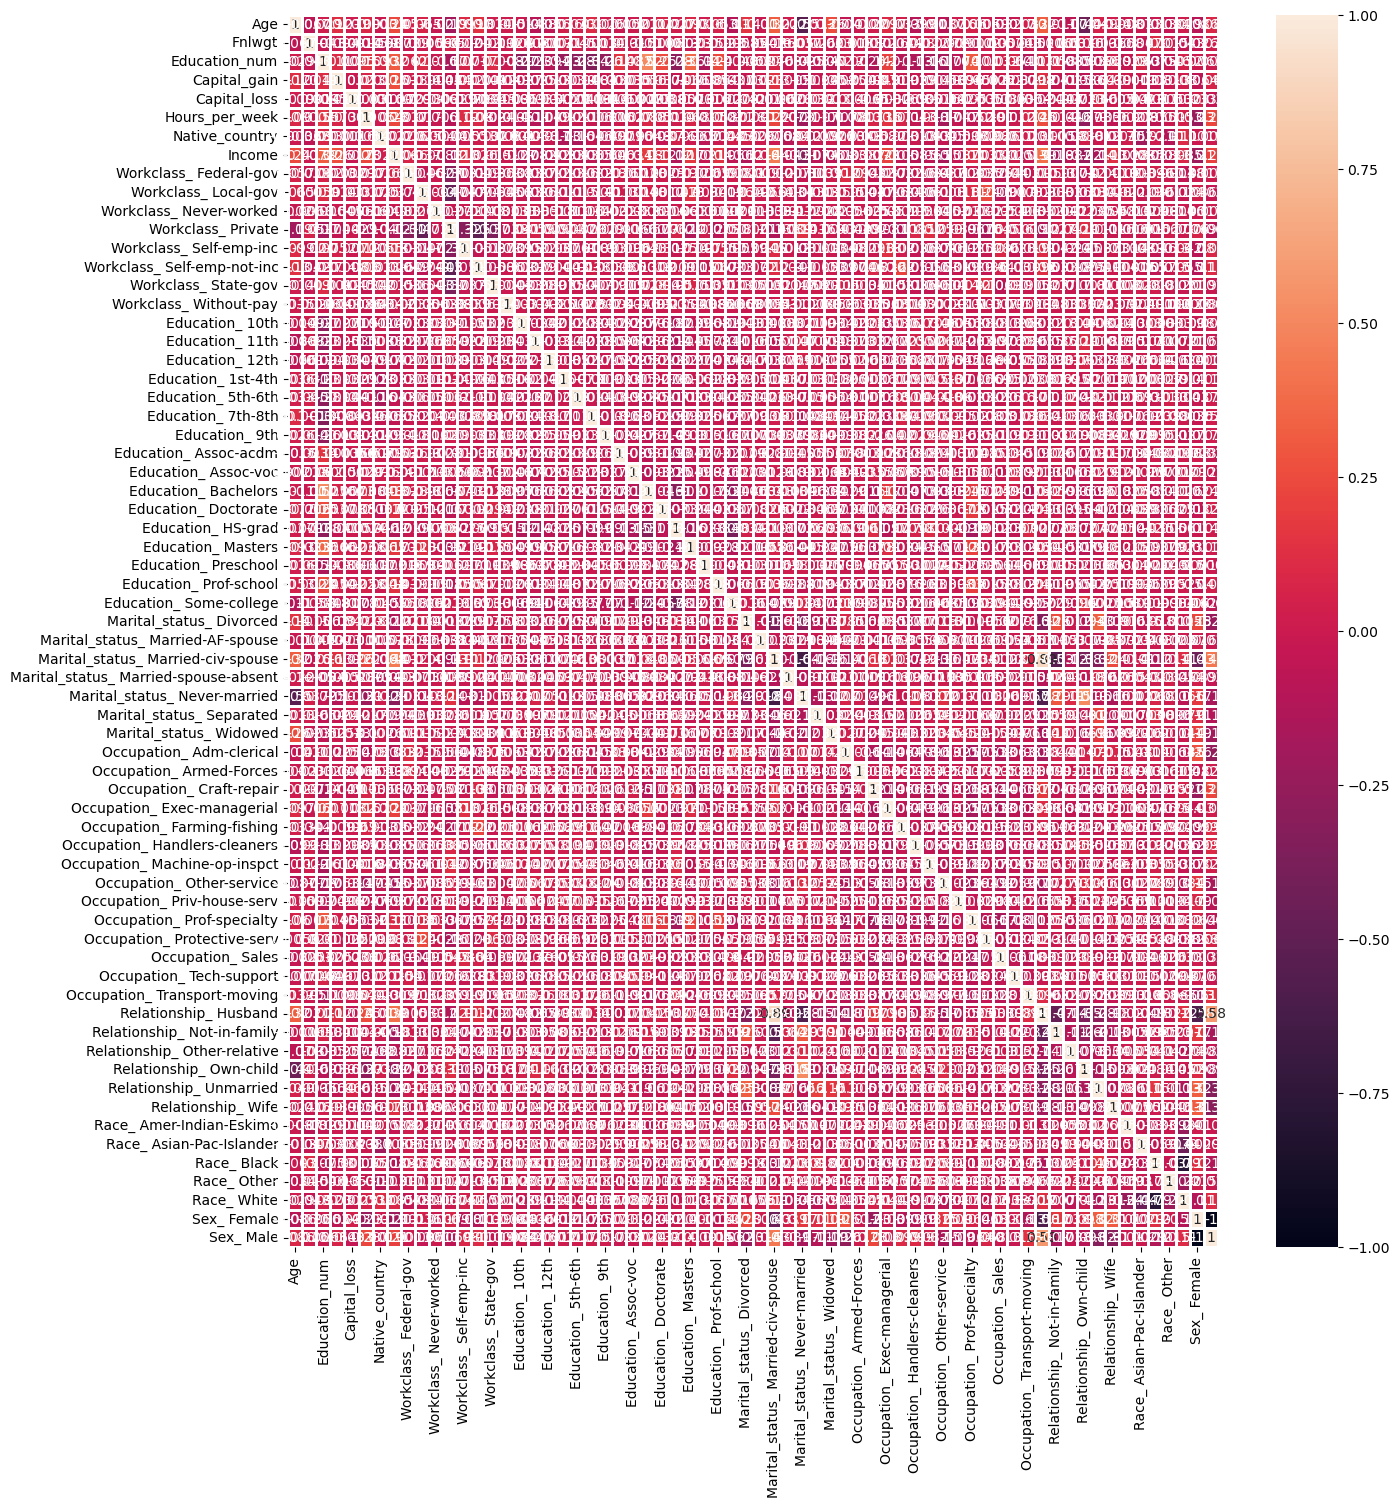

In [85]:
plt.figure(figsize=(15,16))
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()

Visualizing correlation of feature columns with label column.

Native_country,Occupation_Tech-support,fnlwgt etc have the lowest correlation with Income.

In [86]:
X = df.drop(columns = ['Income'])
y = df['Income']

In [87]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [88]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Age,1.740382
1,Fnlwgt,1.041016
2,Education_num,inf
3,Capital_gain,1.041536
4,Capital_loss,1.006589
...,...,...
60,Race_ Black,inf
61,Race_ Other,inf
62,Race_ White,inf
63,Sex_ Female,inf


There is no multicollinearity.

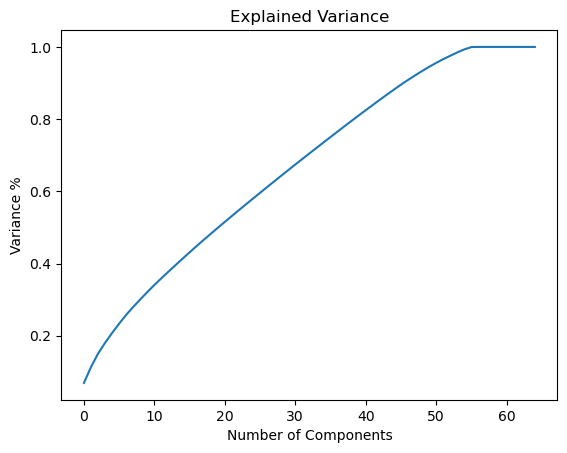

In [89]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

50 components explain around 95% variance in Data

In [90]:
bestfeat = SelectKBest(score_func = f_classif, k = 64)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [92]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(64,'Score'))

                               Feature        Score
33  Marital_status_ Married-civ-spouse  7125.997889
52               Relationship_ Husband  5518.708505
2                        Education_num  3355.382654
35       Marital_status_ Never-married  3223.606450
3                         Capital_gain  2213.446187
..                                 ...          ...
39            Occupation_ Armed-Forces     2.280230
59            Race_ Asian-Pac-Islander     2.187176
9              Workclass_ Never-worked     1.995116
40            Occupation_ Craft-repair     1.590139
1                               Fnlwgt     1.551491

[64 rows x 2 columns]


In [93]:
x_best = X.drop(columns=['Race_ Asian-Pac-Islander','Fnlwgt','Education_ Assoc-acdm','Native_country','Occupation_ Tech-support','Workclass_ Self-emp-not-inc','Education_ Preschool','Marital_status_ Married-AF-spouse','Capital_loss','Occupation_ Craft-repair','Education_ Assoc-voc','Workclass_ State-gov','Workclass_ Without-pay','Occupation_ Sales']).copy()
x_best

,Age,Education_num,Capital_gain,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Education_ 10th,...,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,50,13,-0.296001,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,38,9,-0.296001,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,53,7,-0.296001,40,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,28,13,-0.296001,40,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
4,37,14,-0.296001,40,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,12,-0.296001,38,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
32556,40,9,-0.296001,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
32557,58,9,-0.296001,40,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
32558,22,9,-0.296001,20,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1


In [94]:
scaled_x_best = scaler.fit_transform(x_best)

Balancing out classes in Label column 'Income' using SMOTE technique.

In [95]:
smt_x,smt_y = sm().fit_resample(scaled_x_best,y.ravel())

lets find the random number

In [97]:
from sklearn.linear_model import LogisticRegression
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .2, random_state = i)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8243474540008559 on random_state: 83


In [98]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = 0.2,random_state = 83)

Models

In [104]:
knn = KNeighborsClassifier()
svr = SVR()
rf = RandomForestClassifier()
adbc = AdaBoostClassifier()
lr= LogisticRegression(solver='liblinear')

In [105]:
models = [knn, svr, rf, adbc, lr]

In [108]:
for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    score=i.score(x_train,y_train)
    print(f'{i} had score of {round((score*100),2)}% and r2_score is {r2_score(y_test,pred)}')
    print('')

KNeighborsClassifier() had score of 88.95% and r2_score is 0.41034209242677033

SVR() had score of 56.35% and r2_score is 0.5403157423609168

RandomForestClassifier() had score of 97.81% and r2_score is 0.5408541837256347

AdaBoostClassifier() had score of 84.69% and r2_score is 0.4047792819779663

LogisticRegression(solver='liblinear') had score of 81.4% and r2_score is 0.29737424946644186



RandomForestClassifier gives 97.81% accurate. So we will go with RandomForestClassifier. But lets do cross_check

In [114]:
# cross validation for Linear Regression
cvs1 = cross_val_score(knn,scaled_x_best,y,cv = 5)
print("Cross Validation Score for Linear Regression is ", cvs1.mean())

Cross Validation Score for Linear Regression is  0.8305916121070158


In [115]:
# cross validation for Ridge Regression
cvs2 = cross_val_score(svr,scaled_x_best,y,cv = 5)
print("Cross Validation Score for Ridge Regression is ", cvs2.mean())

Cross Validation Score for Ridge Regression is  0.3049463079630471


In [116]:
# cross validation for RaandomForstClassifier
cvs3 = cross_val_score(rf,scaled_x_best,y,cv = 5)
print("Cross Validation Score for RFC is ", cvs3.mean())

Cross Validation Score for Lasso Regression is  0.8414149602825706


In [117]:
# cross validation for Elastic Net
cvs4 = cross_val_score(adbc,scaled_x_best,y,cv = 5)
print("Cross Validation Score for Elastic Net is ", cvs4.mean())

Cross Validation Score for Elastic Net is  0.8591317758012179


In [118]:
# cross validation for KNeighborsRegressor
cvs5 = cross_val_score(lr,scaled_x_best,y,cv = 5)
print("Cross Validation Score for KNeighborsRegressor is ", cvs5.mean())

Cross Validation Score for KNeighborsRegressor is  0.8453112194494375


In [119]:
for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    r= roc_auc_score(y_test,pred)
    print('roc_auc_score for ', i, r)
    print('')

roc_auc_score for  KNeighborsClassifier() 0.852859443136692

roc_auc_score for  SVR() 0.9186382668112926

roc_auc_score for  RandomForestClassifier() 0.8864557531262771

roc_auc_score for  AdaBoostClassifier() 0.851345375805098

roc_auc_score for  LogisticRegression(solver='liblinear') 0.8245359106229703



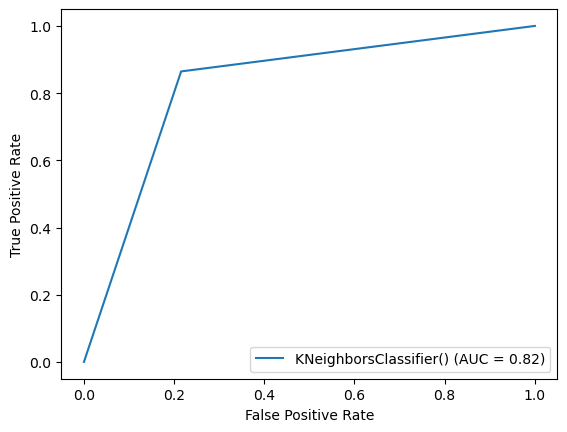

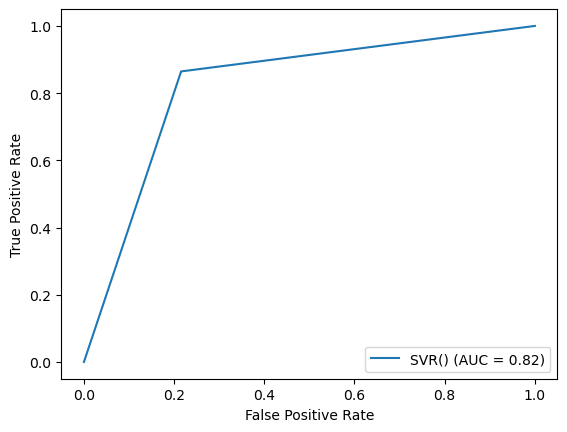

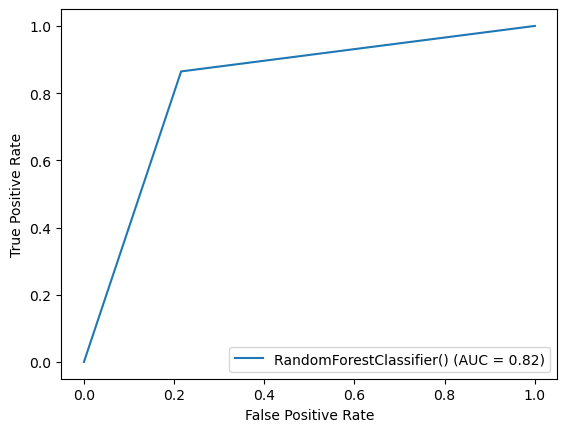

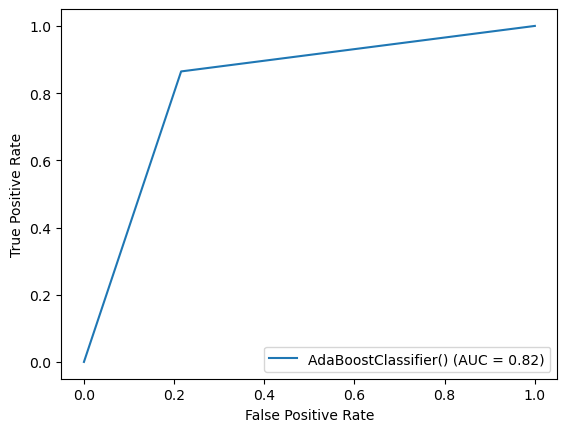

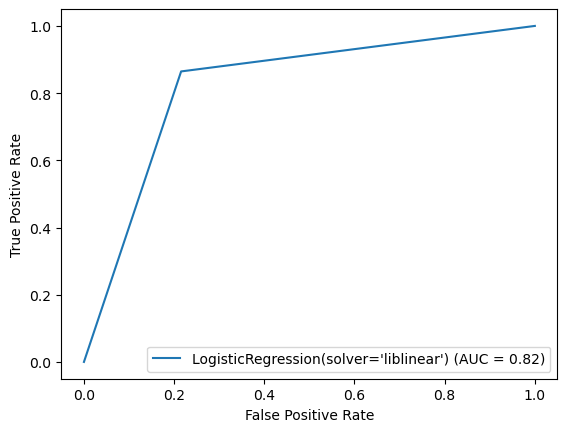

In [111]:
for i in models:
    fpr, tpr, thresholds=metrics.roc_curve(y_test, pred)
    auc=metrics.auc(fpr,tpr)
    view=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=auc,estimator_name=i)
    view.plot()

let's save the model

In [121]:
import pickle
file_name = 'census_income.pickle'
pickle.dump(rf,open(file_name,'wb'))

In [122]:
#get the saved model
saved_model = pickle.load(open(file_name,'rb'))

In [123]:
# predicting with the loaded model
predictions = saved_model.predict(x_test)

In [124]:
# making dataframe
conclusion = pd.DataFrame({})
conclusion['Predictions'] = predictions
conclusion['Actual'] = pred
conclusion

,Predictions,Actual
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
9343,0,0
9344,1,1
9345,1,1
9346,0,0
